## Вариант №87, исходные данные: ##


In [29]:
import numpy as np
data = np.array([[ 1.12289289, 6.25125393],
[ 3.7357457 , 6.20342777],
[ 7.32578667, 1.62834293],
[11.58074328, 9.75581127],
[ 1.93790341, 5.71596316],
[ 8.52551974, 1.1486595 ],
[ 7.21533138, 1.66356672],
[ 0.75475755, 6.04499702],
[ 7.01674675, 1.75151628],
[12.50422055,10.11502227],
[11.39761075,12.47236288],
[ 2.53487873, 5.37864618],
[11.88945169,13.35384912],
[ 7.6897611 , 1.905463 ],
[ 7.91874331, 1.59985032],
[12.67075898, 8.56495707],
[11.78683434,12.58083175],
[11.98340367,12.24154105],
[12.51445117, 9.70528532],
[ 2.55720561, 5.84496902],
[ 6.91166731, 2.45621234],
[11.62123934,11.00861301],
[ 2.09301082, 5.69840226],
[ 8.12786854, 2.05235915],
[12.05074089,12.52862737],
[ 6.6101489 , 1.90286772],
[12.36697927, 8.96598501],
[12.52933127,11.26769068],
[ 7.73778793, 2.93947049],
[ 2.32886019, 5.24777145],
[ 2.09203337, 5.26134109],
[11.70723153, 9.5379003 ],
[ 8.25745567, 1.58405194],
[ 7.42516303, 2.5429153 ],
[10.61624181,11.99082088],
[13.40994683,13.76242885],
[ 7.14956273, 2.14849177],
[ 7.75106758, 2.12577458],
[12.15058007,12.39872947],
[ 7.76732828, 3.07269928],
[ 1.04254917, 5.56120489],
[ 6.58006261, 2.02930023],
[ 0.81700351, 5.90006509],
[ 1.40411847, 5.65000261],
[12.93469231,12.18138227],
[ 2.20856988, 5.56788091],
[ 0.56473385, 6.21891605],
[ 3.96494392, 6.33435649],
[ 1.84593558, 6.0612507 ],
[11.26001504, 9.81443788],
[ 1.38246093, 5.83017864],
[ 7.26481947, 2.43653751],
[12.68962147, 8.32157327],
[ 3.04720692, 5.36278542],
[ 6.89462194, 1.37184563],
[ 6.68205037, 2.03411108],
[ 2.20053106, 5.44994362]])

### 1. Найти минимальное кол-во кластеров, обеспечивающих приемлемый уровень кластеризации. ###

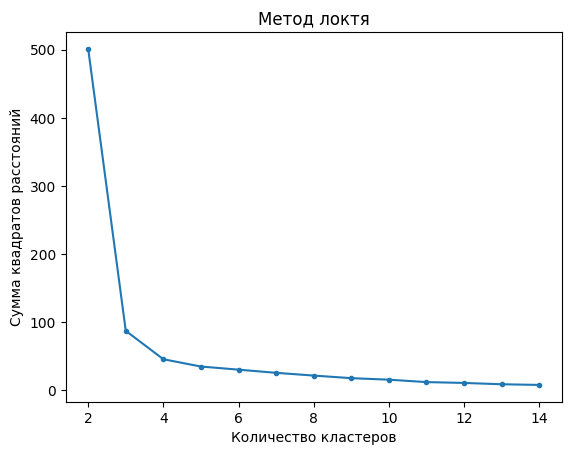

In [30]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

interval = []

for k in range(2,15):
    kmeans = KMeans (n_clusters=k, n_init=10)
    kmeans.fit(data)
    
    #вычеслим сумму квадратов расстояний между точками и центрами для каждого кол-ва кластеров
    interval.append(kmeans.inertia_)

plt.plot(range(2, 15), interval, marker='.')
plt.xlabel("Количество кластеров")
plt.ylabel("Сумма квадратов расстояний")
plt.title("Метод локтя")
plt.show()


### Проанализировав график, можно сделать вывод, что оптимальное кол-во кластеров равно 3. Тк для определения кол-ва кластеров использовался метод локтя (Elbow Method), оптимальное кол-во можно определить по сгибу. Также оптимальное кол-во можно было определить по функциональной зависимости, в нашем случае - это сумма квадратов расстояний. Данная зависимость не особо меняется после 3х кластеров. ### 

### 2. Выполнить кластеризацию данного множества точек методом k-средних по найденному кол-ву кластеров (выбор координат начальных центров масс кластеров не важен). ###

In [31]:
kmeans = KMeans(n_clusters=3, n_init=10)
# Кластеризация
kmeans.fit(data)

# Получаем центры кластеров и метки кластеров для каждой точки
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

print("Метки кластеров:")
print(cluster_labels)

print("Центры кластеров:")
print(cluster_centers)

Метки кластеров:
[2 2 0 1 2 0 0 2 0 1 1 2 1 0 0 1 1 1 1 2 0 1 2 0 1 0 1 1 0 2 2 1 0 0 1 1 0
 0 1 0 2 0 2 2 1 2 2 2 2 1 2 0 1 2 0 0 2]
Центры кластеров:
[[ 7.41323649  2.02073872]
 [12.08758391 11.08251841]
 [ 1.98080745  5.76754507]]


### 3. Напечатать:
### - количество точек в каждом кластере ###
### - координаты центроидов кластеров. ###

В кластере с меткой 0 содержится 19 точек
В кластере с меткой 1 содержится 19 точек
В кластере с меткой 2 содержится 19 точек
Центры кластеров:
[[ 7.41323649  2.02073872]
 [12.08758391 11.08251841]
 [ 1.98080745  5.76754507]]


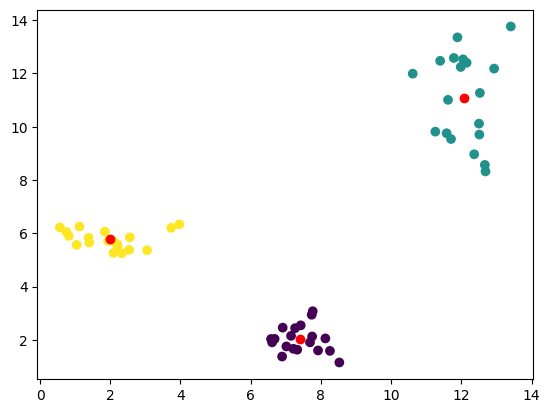

In [32]:
for v in np.unique(cluster_labels):
    print(f"В кластере с меткой {v} содержится {np.sum(cluster_labels == v)} точек"
     )
print("Центры кластеров:")
print(cluster_centers)
plt.scatter(data[:,0], data[:,1], c = cluster_labels )
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c = "r")
plt.show()

## 4. Выполнить кластеризацию (шаг 2) с визуализацией для 3 любых различных значений параметра random_state ##

random_state - параметр в KMeans который влияет на генерацию центроидов кластеров 

#### Укажем random_state равным 10 ####

Метки кластеров:
[0 0 2 1 0 2 2 0 2 1 1 0 1 2 2 1 1 1 1 0 2 1 0 2 1 2 1 1 2 0 0 1 2 2 1 1 2
 2 1 2 0 2 0 0 1 0 0 0 0 1 0 2 1 0 2 2 0]
Центры кластеров:
[[ 1.98080745  5.76754507]
 [12.08758391 11.08251841]
 [ 7.41323649  2.02073872]]
В кластере с меткой 0 содержится 19 точек
В кластере с меткой 1 содержится 19 точек
В кластере с меткой 2 содержится 19 точек


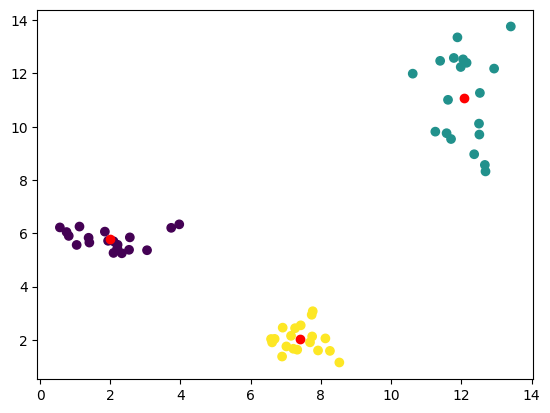

In [33]:
kmeans1 = KMeans(n_clusters=3, random_state=10, n_init=30)
# Кластеризация
kmeans1.fit(data)

# Получаем центры кластеров и метки кластеров для каждой точки
cluster_centers1 = kmeans1.cluster_centers_
cluster_labels1 = kmeans1.labels_

print("Метки кластеров:")
print(cluster_labels1)

print("Центры кластеров:")
print(cluster_centers1)

for v in np.unique(cluster_labels1):
    print(f"В кластере с меткой {v} содержится {np.sum(cluster_labels1 == v)} точек"
     )
plt.scatter(data[:,0], data[:,1], c = cluster_labels1 )
plt.scatter(cluster_centers1[:,0], cluster_centers1[:,1], c = "r")
plt.show()

#### Укажем random_state равным 42 ####

Метки кластеров:
[2 2 1 0 2 1 1 2 1 0 0 2 0 1 1 0 0 0 0 2 1 0 2 1 0 1 0 0 1 2 2 0 1 1 0 0 1
 1 0 1 2 1 2 2 0 2 2 2 2 0 2 1 0 2 1 1 2]
Центры кластеров:
[[12.08758391 11.08251841]
 [ 7.41323649  2.02073872]
 [ 1.98080745  5.76754507]]
В кластере с меткой 0 содержится 19 точек
В кластере с меткой 1 содержится 19 точек
В кластере с меткой 2 содержится 19 точек


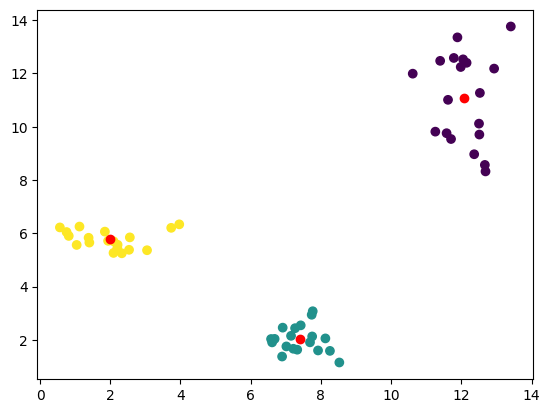

In [34]:
kmeans2 = KMeans(n_clusters=3, random_state=42, n_init=40)
# Кластеризация
kmeans2.fit(data)

# Получаем центры кластеров и метки кластеров для каждой точки
cluster_centers2 = kmeans2.cluster_centers_
cluster_labels2 = kmeans2.labels_

print("Метки кластеров:")
print(cluster_labels2)

print("Центры кластеров:")
print(cluster_centers2)

for v in np.unique(cluster_labels2):
    print(f"В кластере с меткой {v} содержится {np.sum(cluster_labels2 == v)} точек"
          )
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels2)
plt.scatter(cluster_centers2[:, 0], cluster_centers2[:, 1], c="r")
plt.show()

#### Укажем random_state равным 61 ####

Метки кластеров:
[0 0 2 1 0 2 2 0 2 1 1 0 1 2 2 1 1 1 1 0 2 1 0 2 1 2 1 1 2 0 0 1 2 2 1 1 2
 2 1 2 0 2 0 0 1 0 0 0 0 1 0 2 1 0 2 2 0]
Центры кластеров:
[[ 1.98080745  5.76754507]
 [12.08758391 11.08251841]
 [ 7.41323649  2.02073872]]
В кластере с меткой 0 содержится 19 точек
В кластере с меткой 1 содержится 19 точек
В кластере с меткой 2 содержится 19 точек


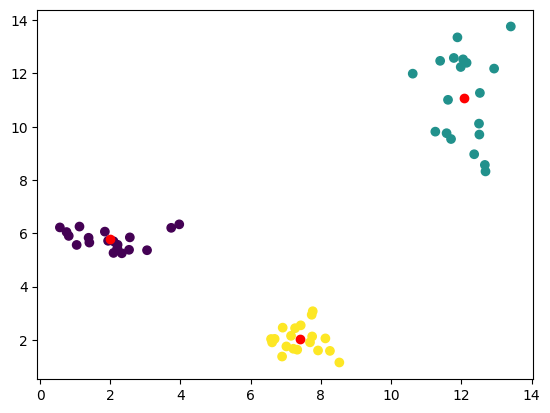

In [35]:
kmeans3 = KMeans(n_clusters=3, random_state=61, n_init=40)
# Кластеризация
kmeans3.fit(data)

# Получаем центры кластеров и метки кластеров для каждой точки
cluster_centers3 = kmeans3.cluster_centers_
cluster_labels3 = kmeans3.labels_

print("Метки кластеров:")
print(cluster_labels3)

print("Центры кластеров:")
print(cluster_centers3)

for v in np.unique(cluster_labels3):
    print(f"В кластере с меткой {v} содержится {np.sum(cluster_labels3 == v)} точек"
          )
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels3)
plt.scatter(cluster_centers3[:, 0], cluster_centers3[:, 1], c="r")
plt.show()

### Сравнив показатель центроид кластеров, можно уидеть, что координаты почти не изменились. Также был использован параметр n_init, используемый для задания кол-ва генерации координат центроид. Одной из причин, по которой данные координат не изменились может являться небольшой размер исходного массива данных. ###